<a href="https://colab.research.google.com/github/Archana-s-s/CognoRise-InfoTech/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SENTIMENT ANALYSIS ON MOVIE REVIEWS

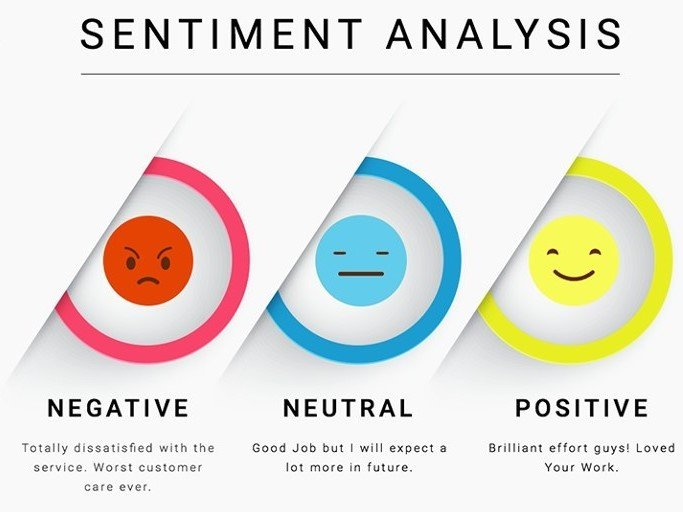

In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
import re
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

In [6]:
colnames=['review','sentiment']
df=pd.read_csv('/content/IMDB Dataset.csv',encoding='ISO-8859-1',names=colnames)
df

,review,sentiment
0,review,sentiment
1,One of the other reviewers has mentioned that ...,positive
2,A wonderful little production. <br /><br />The...,positive
3,I thought this was a wonderful way to spend ti...,positive
4,Basically there's a family where a little boy ...,negative
...,...,...
49996,I thought this movie did a down right good job...,positive
49997,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49998,I am a Catholic taught in parochial elementary...,negative
49999,I'm going to have to disagree with the previou...,negative


Data Wrangling

In [7]:
df.head()

,review,sentiment
0,review,sentiment
1,One of the other reviewers has mentioned that ...,positive
2,A wonderful little production. <br /><br />The...,positive
3,I thought this was a wonderful way to spend ti...,positive
4,Basically there's a family where a little boy ...,negative


In [8]:
df.tail()

,review,sentiment
49996,I thought this movie did a down right good job...,positive
49997,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49998,I am a Catholic taught in parochial elementary...,negative
49999,I'm going to have to disagree with the previou...,negative
50000,No one expects the Star Trek movies to be high...,negative


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50001 non-null  object
 1   sentiment  50001 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [10]:
df.describe()

,review,sentiment
count,50001,50001
unique,49583,3
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [11]:
df.dtypes

review       object
sentiment    object
dtype: object

In [12]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [13]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [14]:
#Check for the uniqueness in the target column.
df['sentiment'].unique()

array(['sentiment', 'positive', 'negative'], dtype=object)

In [15]:
#Droping the data entry error 'sentiment' from the sentiment column.
df.drop(df.index[df['sentiment']=='sentiment'],axis=0,inplace=True)
df

,review,sentiment
1,One of the other reviewers has mentioned that ...,positive
2,A wonderful little production. <br /><br />The...,positive
3,I thought this was a wonderful way to spend ti...,positive
4,Basically there's a family where a little boy ...,negative
5,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49996,I thought this movie did a down right good job...,positive
49997,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49998,I am a Catholic taught in parochial elementary...,negative
49999,I'm going to have to disagree with the previou...,negative


In [16]:
df.reset_index(drop=True,inplace=True)#Index correction
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [17]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [18]:
#Replace Positive:1,Negative=0 in target variable
df['sentiment']=df['sentiment'].map({'positive':1,'negative':0})
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


# Data Visualization

In [19]:
#Get the count for target variables.
sentiment_count=df['sentiment'].value_counts()
sentiment_count

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [20]:
#PieChart
pie_chart = px.pie(sentiment_count,
                  values=sentiment_count.values,
                  names=sentiment_count.index,
                  color=sentiment_count.index,
                  title='Distribution of Positive and Negative Reviews',
                  labels={'values': 'Frequency', 'names': 'sentiment'},
                       hole=.4,)
# Show the pie chart
pie_chart.show()

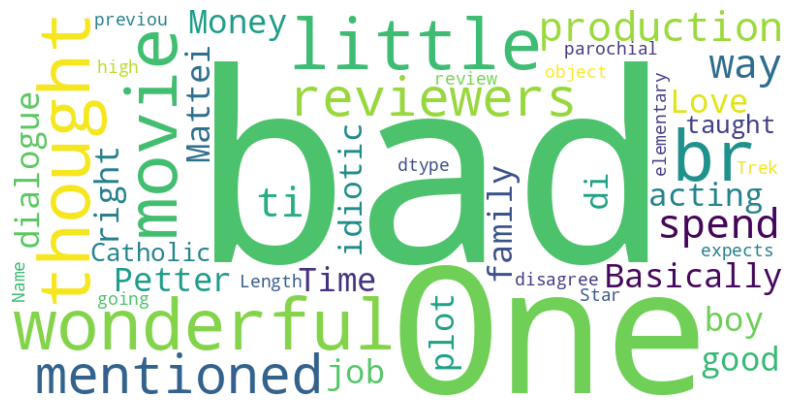

In [21]:
#Reviews
words=df['review']

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(str(words))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Data Preprocessing

In [22]:
#Download all the package
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [23]:
#Removing html tags
def removing_html_tags(reviews):
    return re.sub(r'<[^<]+?>', '', reviews)

df['review']=df['review'].apply(removing_html_tags)

In [24]:
df['review'].str.contains('html')

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: review, Length: 50000, dtype: bool

In [25]:
def removing_url(text):
    return re.sub(r'http[s]?://\S+|www\.\S+', '', text)

In [26]:
df['review'] = df['review'].apply(removing_url)

In [27]:
df['review'].str.contains('url')

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: review, Length: 50000, dtype: bool

In [28]:
#Assigning reviews to a variable
text=df.review
text

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. The filming tec...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [29]:
#Tokenization
from nltk import TweetTokenizer
tk=TweetTokenizer()
text=text.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))#To join the tokens together with a space
text

0        One of the other reviewers has mentioned that ...
1        A wonderful little production . The filming te...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's " Love in the Time of Money " ...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot , bad dialogue , bad acting , idiotic...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [30]:
#Removing Special characters
text=text.str.replace('[^a-zA-Z0-9]+',' ')# '+' is used to remove combination of special characters
text

0        One of the other reviewers has mentioned that ...
1        A wonderful little production . The filming te...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's " Love in the Time of Money " ...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot , bad dialogue , bad acting , idiotic...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
#Removing words having length less than 3 also index should be corrected
from nltk.tokenize import word_tokenize
text=text.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
text

# Stemming

In [32]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
text=text.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
text

0        one the other review has mention that after wa...
1        wonder littl product the film techniqu veri un...
2        thought this was wonder way spend time too hot...
3        basic there famili where littl boy jake think ...
4        petter mattei love the time money visual stun ...
                               ...                        
49995    thought this movi did down right good job was ...
49996    bad plot bad dialogu bad act idiot direct the ...
49997    cathol taught parochi elementari school nun ta...
49998    go have disagre with the previous comment and ...
49999    one expect the star trek movi high art but the...
Name: review, Length: 50000, dtype: object

# Vectorization

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(text)

In [34]:
train_data.shape

(50000, 81501)

In [35]:
y=df['sentiment'].values
y

array([1, 1, 1, ..., 0, 0, 0])

# Model training

In [36]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.30,random_state=42)
x_train

<35000x81501 sparse matrix of type '<class 'numpy.float64'>'
	with 4175414 stored elements in Compressed Sparse Row format>

In [37]:
x_test

<15000x81501 sparse matrix of type '<class 'numpy.float64'>'
	with 1802153 stored elements in Compressed Sparse Row format>

In [38]:
y_train

array([0, 1, 0, ..., 0, 1, 1])

In [39]:
y_test

array([1, 1, 0, ..., 0, 1, 1])

In [40]:
l_model=LogisticRegression()
k_model=KNeighborsClassifier(n_neighbors=7)
n_model=MultinomialNB()
d_model=DecisionTreeClassifier(criterion='entropy')
r_model=RandomForestClassifier(criterion='entropy')
x_model=XGBClassifier()
lst_model=[l_model,k_model,n_model,d_model,r_model,x_model]

In [ ]:
for i in lst_model:
  print("Model name is",i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("*****************")
  print(confusion_matrix(y_test,y_pred))
  print("Acuracy score is",i)
  print(accuracy_score(y_test,y_pred))

Model name is LogisticRegression()
*****************
[[6555  856]
 [ 713 6876]]
Acuracy score is LogisticRegression()
0.8954
Model name is KNeighborsClassifier(n_neighbors=7)


In [ ]:
l_model.fit(x_train,y_train)
y_pred1=l_model.predict(x_test)
y_pred1

# Model evaluation

In [ ]:
print(classification_report(y_pred1, y_test))